In [207]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
import cv2
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn
import os

In [208]:
#Folder containing images of the flower database
path = '/Users/joostberkelbach/Documents/Machine Learning/Assignment 2/flowers/'

In [1]:
#Selecting the input size of the images for the CNN
Image_Size = 150

In [210]:
#Creating the preprocessing transformations that will be applied to the training data
transformer = {
    'original': transform.Compose([
                                 transform.Resize((Image_Size, Image_Size)),
                                 transform.ToTensor(), 
                                 transform.Normalize((0.4124234616756439, 0.3674212694168091, 0.2578217089176178), 
                                                     (0.3268945515155792, 0.29282665252685547, 0.29053378105163574))
]), 
   'dataset1': transform.Compose([
                           transform.Resize((Image_Size, Image_Size)),
                           transform.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                           transform.RandomRotation(5),
                           transform.RandomAffine(degrees=11, translate=(0.1,0.1), scale=(0.8,0.8)),
                           transform.ToTensor(),
                           transform.Normalize((0.4124234616756439, 0.3674212694168091, 0.2578217089176178), 
                                               (0.3268945515155792, 0.29282665252685547, 0.29053378105163574)),
]), 
   'dataset2': transform.Compose([
                                 transform.Resize((Image_Size, Image_Size)),
                                 transform.RandomHorizontalFlip(),
                                 transform.RandomRotation(10),
                                 transform.RandomAffine(translate=(0.05,0.05), degrees=0),
                                 transform.ToTensor(),
                                 transform.RandomErasing(inplace=True, scale=(0.01, 0.23)),
                                 transform.Normalize((0.4124234616756439, 0.3674212694168091, 0.2578217089176178), 
                                                     (0.3268945515155792, 0.29282665252685547, 0.29053378105163574))]),
   'dataset3': transform.Compose([
                                 transform.Resize((Image_Size, Image_Size)),
                                 transform.RandomHorizontalFlip(p=0.5),
                                 transform.RandomRotation(15),
                                 transform.RandomAffine(translate=(0.08,0.1), degrees=15),
                                 transform.ToTensor(),
                                 transform.Normalize((0.4124234616756439, 0.3674212694168091, 0.2578217089176178), 
                                                     (0.3268945515155792, 0.29282665252685547, 0.29053378105163574))
                                                     
])
       }

In [211]:
#Applying the transformations to the images
original = ImageFolder(path, transform=transformer['original'])
transform1 = ImageFolder(path, transform=transformer['dataset1'])
transform2 = ImageFolder(path, transform=transformer['dataset2'])
transform3 = ImageFolder(path, transform=transformer['dataset3'])
                         

In [212]:
#Splitting the dataset into a training set (80) and a testing set (20%)
train_val, test = train_test_split(original,test_size=0.2, shuffle = True , random_state = 43)

In [213]:
#Adding the transformations to the training set to artificially increase its size
train = ConcatDataset([train_val, transform1, transform2, transform3])

In [214]:
#Separating the images and classes into separate arrays
X_Test = []
Y_Test = []


for i in range(len(test)):
    Y_Test.append(test[i][1])
    X_Test.append(test[i][0].numpy())



In [215]:
X_Test = np.reshape(X_Test, (864,Image_Size,Image_Size,3))

In [216]:
Test = []

for i in range(len(test)):
    if Y_Test[i]==0:
        Test.append([1,0,0,0,0])
    elif Y_Test[i]==1:
        Test.append([0,1,0,0,0]) 
    elif Y_Test[i]==2:
        Test.append([0,0,1,0,0])    
    elif Y_Test[i]==3:
        Test.append([0,0,0,1,0])    
    elif Y_Test[i]==4:
        Test.append([0,0,0,0,1])    

In [217]:
Test = np.array(Test)

In [218]:
Y_Test = np.reshape(Test, (864,5))

In [219]:
#Separating the images and classes into separate arrays
X_Train = []
Y_Train = []


for i in range(len(train)):
    Y_Train.append(train[i][1])
    X_Train.append(train[i][0].numpy())
    
X_Train = np.reshape(X_Train, (len(train),Image_Size,Image_Size,3))

In [221]:
Train = []

for i in range(len(train)):
    if Y_Train[i]==0:
        Train.append([1,0,0,0,0])
    elif Y_Train[i]==1:
        Train.append([0,1,0,0,0]) 
    elif Y_Train[i]==2:
        Train.append([0,0,1,0,0])    
    elif Y_Train[i]==3:
        Train.append([0,0,0,1,0])    
    elif Y_Train[i]==4:
        Train.append([0,0,0,0,1])   

In [222]:
Train = np.array(Train)

In [223]:
Y_Train = np.reshape(Train, (len(train),5))

In [224]:
#Building the model
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (Image_Size,Image_Size,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [225]:
#Setting the training parameters
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [226]:
#Augmentations that are performed on all data
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.2, 
        height_shift_range=0.2,  
        horizontal_flip=True,
        vertical_flip=False)  

datagen.fit(X_Train)

In [227]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [228]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 18, 18, 96)      

In [229]:
#Training the model
history = model.fit(datagen.flow(X_Train,Y_Train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_Test,Y_Test),
                              verbose = 1, steps_per_epoch=X_Train.shape[0] // batch_size)

Epoch 1/50
128/128 [==============================] - 209s 2s/step - loss: 1.4720 - accuracy: 0.3566 - val_loss: 1.2790 - val_accuracy: 0.4491
Epoch 2/50
128/128 [==============================] - 212s 2s/step - loss: 1.2625 - accuracy: 0.4760 - val_loss: 1.1577 - val_accuracy: 0.5278
Epoch 3/50
128/128 [==============================] - 200s 2s/step - loss: 1.1628 - accuracy: 0.5285 - val_loss: 1.1802 - val_accuracy: 0.5370
Epoch 4/50
128/128 [==============================] - 195s 2s/step - loss: 1.0361 - accuracy: 0.5879 - val_loss: 1.0791 - val_accuracy: 0.5718
Epoch 5/50
128/128 [==============================] - 191s 1s/step - loss: 0.9801 - accuracy: 0.6065 - val_loss: 0.9080 - val_accuracy: 0.6528
Epoch 6/50
128/128 [==============================] - 190s 1s/step - loss: 0.9140 - accuracy: 0.6358 - val_loss: 1.0405 - val_accuracy: 0.6053
Epoch 7/50
128/128 [==============================] - 190s 1s/step - loss: 0.8792 - accuracy: 0.6561 - val_loss: 0.9377 - val_accuracy: 0.6424

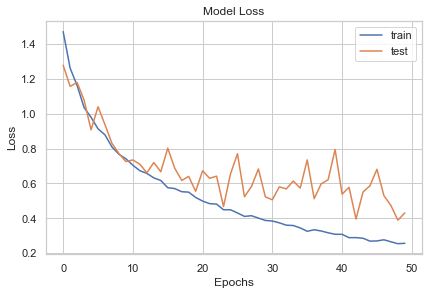

In [242]:
#Plotting the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.savefig('Model_Loss.png')
plt.show()

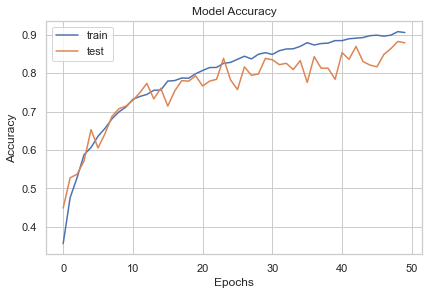

In [243]:
#Plotting the model accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.savefig('Model_Accuracy.png')
plt.show()

In [237]:
#Saving the model progress
from tensorflow import keras
model = model
model.save('/Users/joostberkelbach/Documents/Machine Learning/Model Changed Dataset')

INFO:tensorflow:Assets written to: /Users/joostberkelbach/Documents/Machine Learning/Model Changed Dataset/assets


In [252]:
# getting predictions on val set.
Predictions = model.predict(X_Test)
Predictions_digits=np.argmax(Predictions,axis=1)
from numpy import asarray
from numpy import savetxt

savetxt('CNN_Predictions.csv', Predictions, delimiter=',')

In [248]:
#Setting up a confusion matrix
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Greens")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

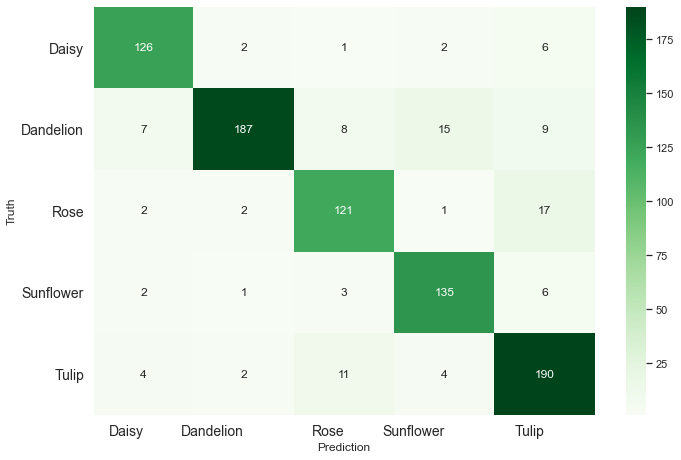

In [249]:
obtained = []
truth = []
classes = ['daisy','dandelion','rose','sunflower','tulip']

for i in range(len(Predictions)) : 
    obtained.append(classes[np.argmax(Predictions[i])])
    if Y_Test[i][0]==1:
        truth.append(classes[0])
    elif Y_Test[i][1]==1:
        truth.append(classes[1])
    elif Y_Test[i][2]==1:
        truth.append(classes[2])
    elif Y_Test[i][3]==1:
        truth.append(classes[3])
    elif Y_Test[i][4]==1:
        truth.append(classes[4])

cm = confusion_matrix(truth,obtained)
print_confusion_matrix(cm,['Daisy','Dandelion','Rose','Sunflower','Tulip'])

In [250]:
from sklearn.metrics import f1_score

In [251]:
#F1 score compiler
F1 = f1_score(obtained,truth,average=None)
for i in [0,1,2,3,4]:
    print("F1 score","",classes[i],"     ",F1[i])

F1 score  daisy       0.9064748201438848
F1 score  dandelion       0.8904761904761904
F1 score  rose       0.843205574912892
F1 score  sunflower       0.8881578947368421
F1 score  tulip       0.8656036446469249


In [253]:
#Assessment metrics
## FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Recall : " + str(TPR))
#print("Overall Reacll : " + str(np.sum(TPR)))
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision: " + str(PPV))
#print("Overall Precision : " + str(np.sum(PPV)))
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Positive likelihood ratio
LR = TPR/FPR

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy", ACC)
#print("Overall Accuracy: " + str(np.sum(ACC)))

Recall : [0.91970803 0.82743363 0.84615385 0.91836735 0.90047393]
Precision: [0.89361702 0.96391753 0.84027778 0.85987261 0.83333333]
Accuracy [0.96990741 0.94675926 0.94791667 0.96064815 0.93171296]


In [245]:
def get_model_memory_usage(batch_size, model):
    import numpy as np
    try:
        from keras import backend as K
    except:
        from tensorflow.keras import backend as K

    shapes_mem_count = 0
    internal_model_mem_count = 0
    for l in model.layers:
        layer_type = l.__class__.__name__
        if layer_type == 'Model':
            internal_model_mem_count += get_model_memory_usage(batch_size, l)
        single_layer_mem = 1
        out_shape = l.output_shape
        if type(out_shape) is list:
            out_shape = out_shape[0]
        for s in out_shape:
            if s is None:
                continue
            single_layer_mem *= s
        shapes_mem_count += single_layer_mem

    trainable_count = np.sum([K.count_params(p) for p in model.trainable_weights])
    non_trainable_count = np.sum([K.count_params(p) for p in model.non_trainable_weights])

    number_size = 4.0
    if K.floatx() == 'float16':
        number_size = 2.0
    if K.floatx() == 'float64':
        number_size = 8.0

    total_memory = number_size * (batch_size * shapes_mem_count + trainable_count + non_trainable_count)
    gbytes = np.round(total_memory / (1024.0 ** 3), 3) + internal_model_mem_count
    return gbytes

In [246]:
get_model_memory_usage(batch_size, model)

0.758